<a href="https://colab.research.google.com/github/tanupat085/test/blob/master/Copy_of_autoencoder_reconstruction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#%tensorflow_version 2.x
import tensorflow as tf
import numpy as np
from tensorflow.keras import Model, Input, layers, losses, optimizers, datasets
from matplotlib import pyplot as plt

In [2]:
(X, Y), (Xtest, Ytest) = datasets.mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


In [3]:
X = X.reshape((len(X), -1)).astype(np.float32) / 255.0
Xtest = Xtest.reshape((len(Xtest), -1)).astype(np.float32) / 255.0

In [4]:
# 784-392-196-98-196-392-784
inputs = Input(shape=X.shape[1])

en1 = layers.Dense(X.shape[1] // 2, activation='relu')
en2 = layers.Dense(X.shape[1] // 4, activation='relu')
en3 = layers.Dense(X.shape[1] // 8, activation='relu')

de1 = layers.Dense(X.shape[1] // 4, activation='relu')
de2 = layers.Dense(X.shape[1] // 2, activation='relu')
de3 = layers.Dense(X.shape[1], activation='relu')

outputs = de3(de2(de1(en3(en2(en1(inputs))))))

model = Model(inputs, outputs)

In [5]:
model.compile(loss=losses.MeanSquaredError(),
              optimizer=optimizers.SGD(learning_rate=0.1))

In [6]:
model.fit(X, X, epochs=50)

Epoch 1/50
1875/1875 [==============================] - 6s 2ms/step - loss: 0.0789
Epoch 2/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0684
Epoch 3/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0559
Epoch 4/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0481
Epoch 5/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0437
Epoch 6/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0408
Epoch 7/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0386
Epoch 8/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0368
Epoch 9/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0355
Epoch 10/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0340
Epoch 11/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0324
Epoch 12/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0315
E

In [7]:
Xtestencoded = en3(en2(en1(Xtest))).numpy()

In [8]:
Xtestencoded.shape

(10000, 98)

In [9]:
Recon = de3(de2(de1(Xtestencoded))).numpy()
print(Recon.shape)

(10000, 784)


In [10]:
Recon = Recon.reshape((len(Recon), 28, 28))
print(Recon.shape)

(10000, 28, 28)


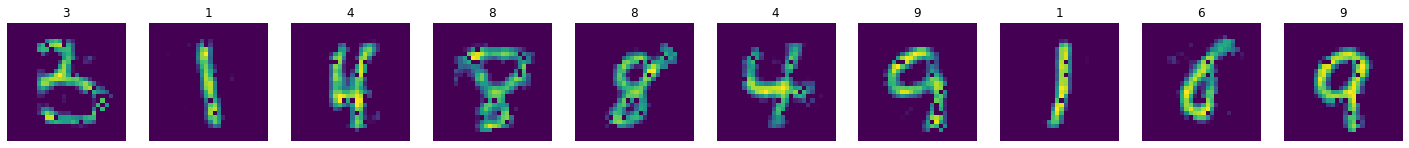

In [11]:
n = 10
plt.figure(figsize=(25, 25))
for j, i in enumerate(np.random.randint(0, len(Recon), n)):
  plt.subplot(1, n, j+1)
  plt.imshow(Recon[i])
  plt.title(Ytest[i])
  plt.axis('off')
plt.show()

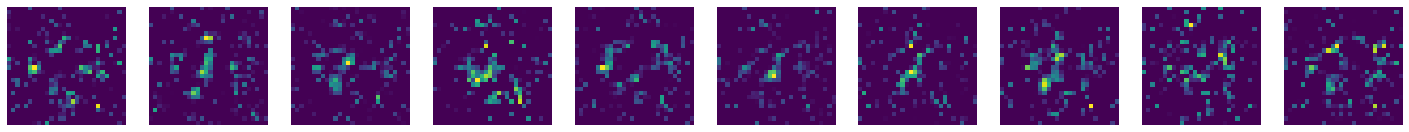

In [12]:
n = 10
random_input = np.random.rand(n, Xtestencoded.shape[1]).astype(np.float32)
random_decoded = de3(de2(de1(random_input))).numpy().reshape((n, 28, 28))
plt.figure(figsize=(25,25))
for i in range(n):
  plt.subplot(1, n, i+1)
  plt.imshow(random_decoded[i])
  plt.axis('off')
plt.show()

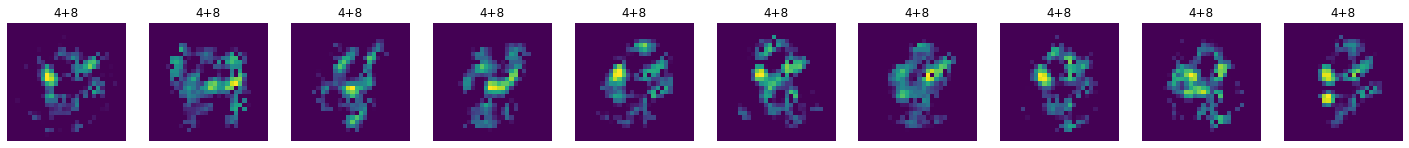

In [13]:
p = [4, 8]
p1 = np.where(Ytest==p[0])[0]
p2 = np.where(Ytest==p[1])[0]
n = 10
plt.figure(figsize=(25,25))
for i in range(n):
  temp = Xtestencoded[[np.random.choice(p1), np.random.choice(p2)]]
  x = np.hstack((temp[0, :temp.shape[1]//2], temp[1, temp.shape[1]//2:])).reshape(1, temp.shape[1])
  Recon = de3(de2(de1(x))).numpy()
  Recon = Recon.reshape((len(Recon), 28, 28))[0]
  plt.subplot(1, n, i+1)
  plt.imshow(Recon)
  plt.title(str(p[0])+ '+' +str(p[1]))
  plt.axis('off')
plt.show()